# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = output_file_directory + "/dataframes_for_input/"

In [5]:
path_xena = input_file_directory + "xenabrowser_brut_data/"

# II] Data download

In [6]:
%%time
# DL data ATG7 isoform expression
df_ori = pandas.read_csv(path+'all_transcripts_zscore.tsv', sep = '\t', index_col=0)
print(df_ori.shape)
df_ori.head()

(46490, 4385)
Wall time: 1min 6s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-144GO-0126-SM-5LUAO,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,0.201517,0.036483,-2.678424,-1.913425,-0.196345,-1.555508,0.632833,-2.103236,0.078840,-0.065244,...,-1.851241,-0.028877,0.104782,-1.695963,-0.742029,-0.091520,0.168139,-1.158666,1.260004,-0.326773
ENST00000583693.5,-0.157536,-0.387785,0.348795,0.398806,-1.129253,0.687884,0.582988,0.557330,-1.350953,-1.209634,...,-0.173132,-1.156789,-0.024576,0.025022,0.682437,-0.352807,2.375209,-0.067561,2.293898,-0.429855
ENST00000012134.6,-1.858374,-0.230357,-1.101552,-1.678630,0.351186,-0.498028,0.051742,0.196520,-0.976582,0.499852,...,-0.537618,-0.037223,0.879018,-1.132267,0.183165,-0.377856,-0.203226,-0.120816,1.457736,-0.879079
ENST00000403263.5,1.824639,0.803760,-0.939061,-0.804629,-0.097733,-0.456441,2.261055,0.277584,2.031893,-0.600251,...,-0.607003,-0.588132,0.423970,0.384197,-1.341820,0.128895,-0.985785,0.765705,0.074665,-1.675408
ENST00000449352.6,-0.714858,0.391161,-0.649496,-0.251540,0.275481,-0.622791,0.703996,-0.210234,-1.321825,0.461139,...,1.286650,-1.422651,0.540561,-0.532098,-1.155870,-1.024148,0.439395,-0.473859,-1.347097,-2.987846


In [7]:
# DL phenotype GTEX info
GTEX_info = pandas.read_csv(path_xena+'GTEX_info.tsv', sep = '\t', index_col=0)
GTEX_info = GTEX_info[['_primary_site']]

GTEX_info.head()

,_primary_site
sample,
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue
GTEX-1117F-0426-SM-5EGHI,Muscle
GTEX-1117F-0526-SM-5EGHJ,Blood Vessel
GTEX-1117F-0626-SM-5N9CS,Blood Vessel
GTEX-1117F-0726-SM-5GIEN,Heart


# III] Data transform

In [8]:
# Subset to select only ATG7(1)/(2)
ATG7_1 = 'ENST00000354449.7'
ATG7_2 = 'ENST00000354956.9'

df = df_ori.loc[[ATG7_1,ATG7_2]]
df = df.T

df = pandas.concat([GTEX_info, df], axis=1)

##Column rename
df = df.rename(columns = {'_primary_site' : 'Primary_Site',
                          'ENST00000354449.7' : 'ATG7_1',
                          'ENST00000354956.9' : 'ATG7_2'})

df = df.dropna(subset=['ATG7_1'])
print(df.shape)
df.head(2)

(4385, 3)


,Primary_Site,ATG7_1,ATG7_2
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,-1.375953,0.350204
GTEX-1117F-0526-SM-5EGHJ,Blood Vessel,-1.835383,1.158579


In [9]:
#Remove tissues with lower than 20 samples. 
element_to_delete = []

#select all the elements in primary sites, and note which one are <20
working_elements = df["Primary_Site"].to_list()
for element in working_elements:
    if working_elements.count(element) < 20:
        element_to_delete.append(element)

#Convert to Set() to have a clear list because set cannot contain duplicate. 
element_to_delete = set(element_to_delete)
print('elements with less than 20 samples are:', element_to_delete)

#Remove the samples where the tissue is represented less than 20 times
print('\nshape with all the elements', df.shape)
for element in element_to_delete:
    df = df.loc[df["Primary_Site"] != element]
print('shape after removing the elements', df.shape)

df.head(5)

elements with less than 20 samples are: {'Liver', 'Heart', 'Fallopian Tube', 'Pancreas', 'Bladder', 'Cervix Uteri', 'Bone Marrow', 'Muscle', '<not provided>', 'Kidney'}

shape with all the elements (4385, 3)
shape after removing the elements (4310, 3)


,Primary_Site,ATG7_1,ATG7_2
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,-1.375953,0.350204
GTEX-1117F-0526-SM-5EGHJ,Blood Vessel,-1.835383,1.158579
GTEX-1117F-0626-SM-5N9CS,Blood Vessel,-0.256167,-0.971217
GTEX-1117F-1326-SM-5EGHH,Adipose Tissue,-3.552084,0.962351
GTEX-1117F-2226-SM-5N9CH,Ovary,-0.832993,-1.142360


# III] ATG7 expression per tissues

In [10]:
path2 = output_file_directory + 'ATG7/TCGA_GTEX/all_tissues/figs_ATG7_characterisation/'

## A. ATG7(1) and ATG7(2) difference in expression for all tissues

Adipose Tissue
corrected P: 0.04329724225808746
n: 421


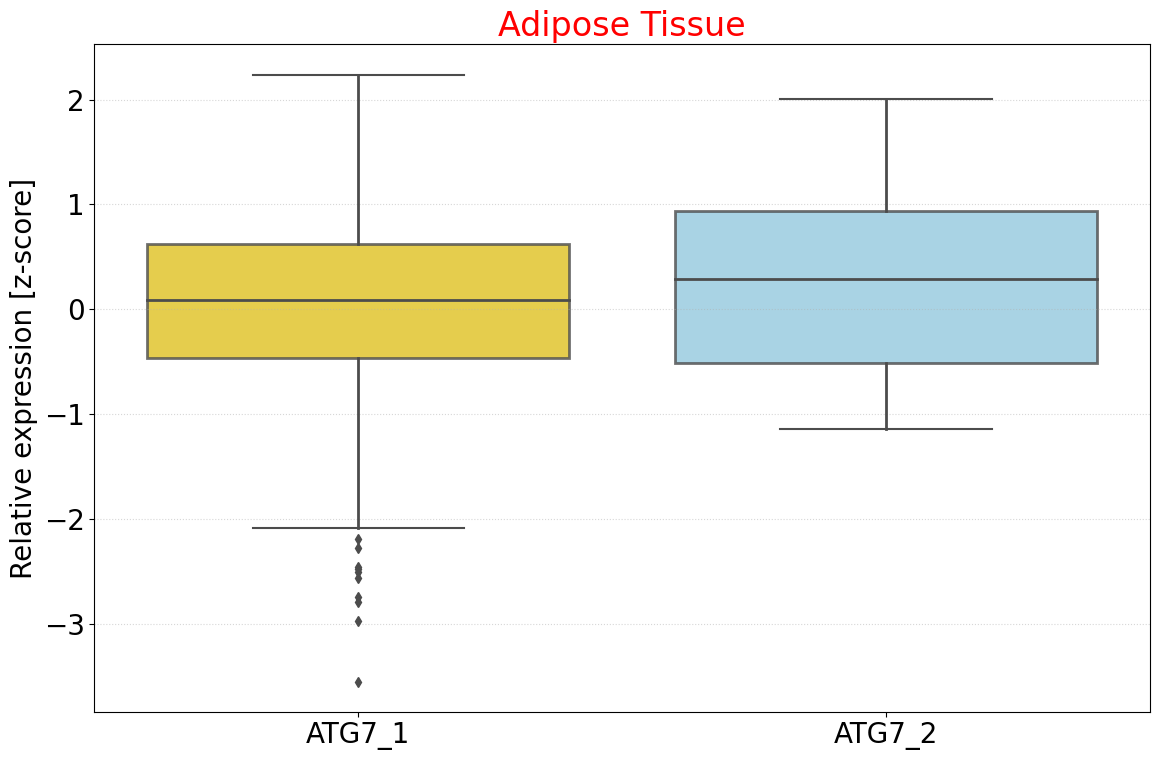

Thyroid
corrected P: 1.5182616929238865e-06
n: 258


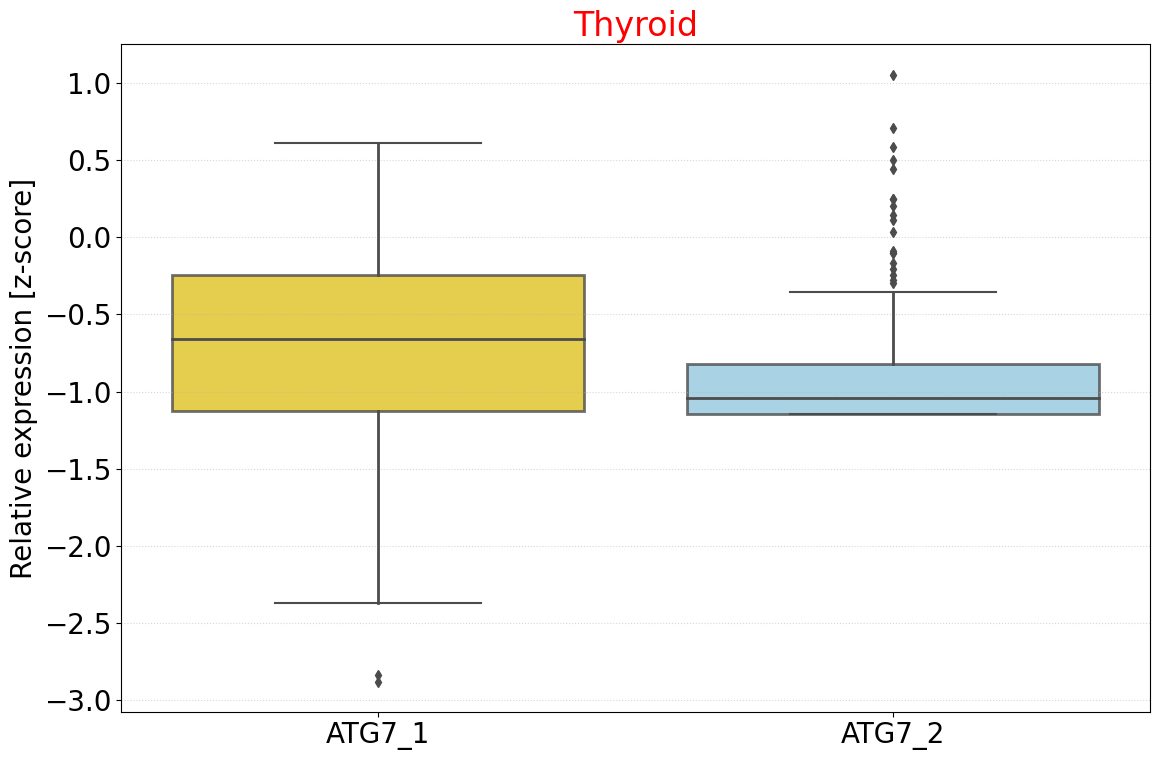

Lung
corrected P: 4.517396234370368e-06
n: 277


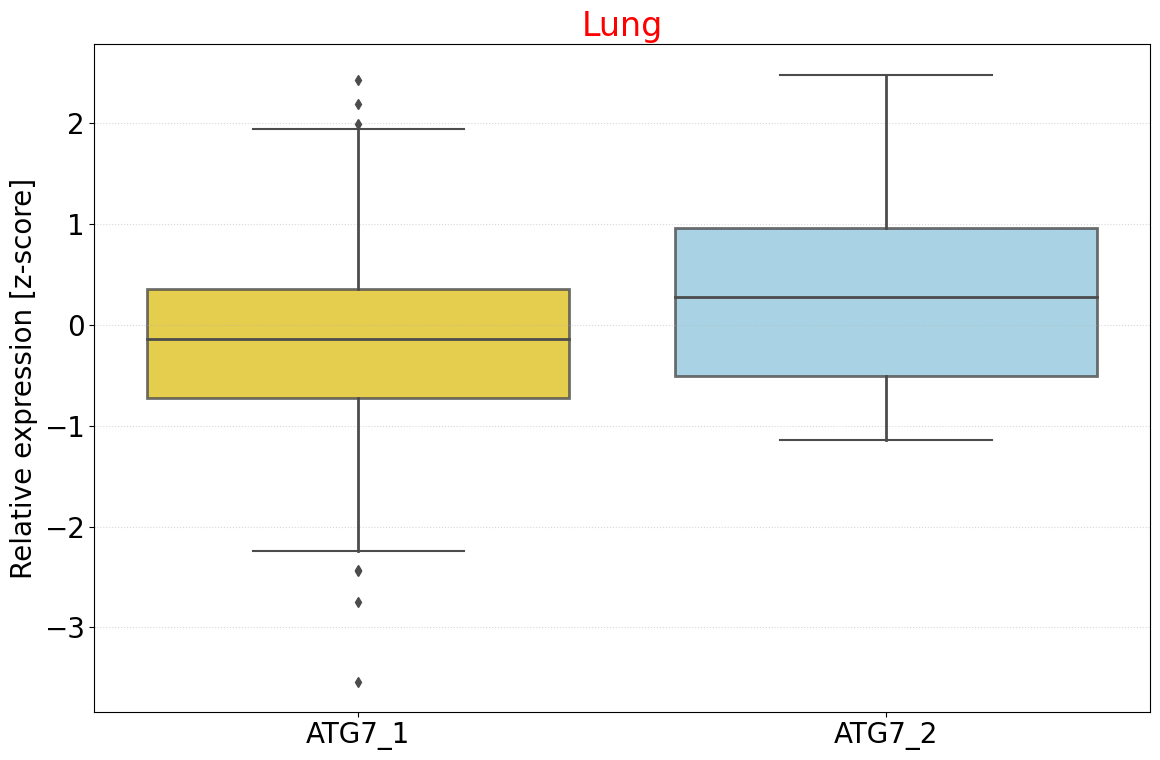

Pituitary
corrected P: 6.572874096694734e-08
n: 104


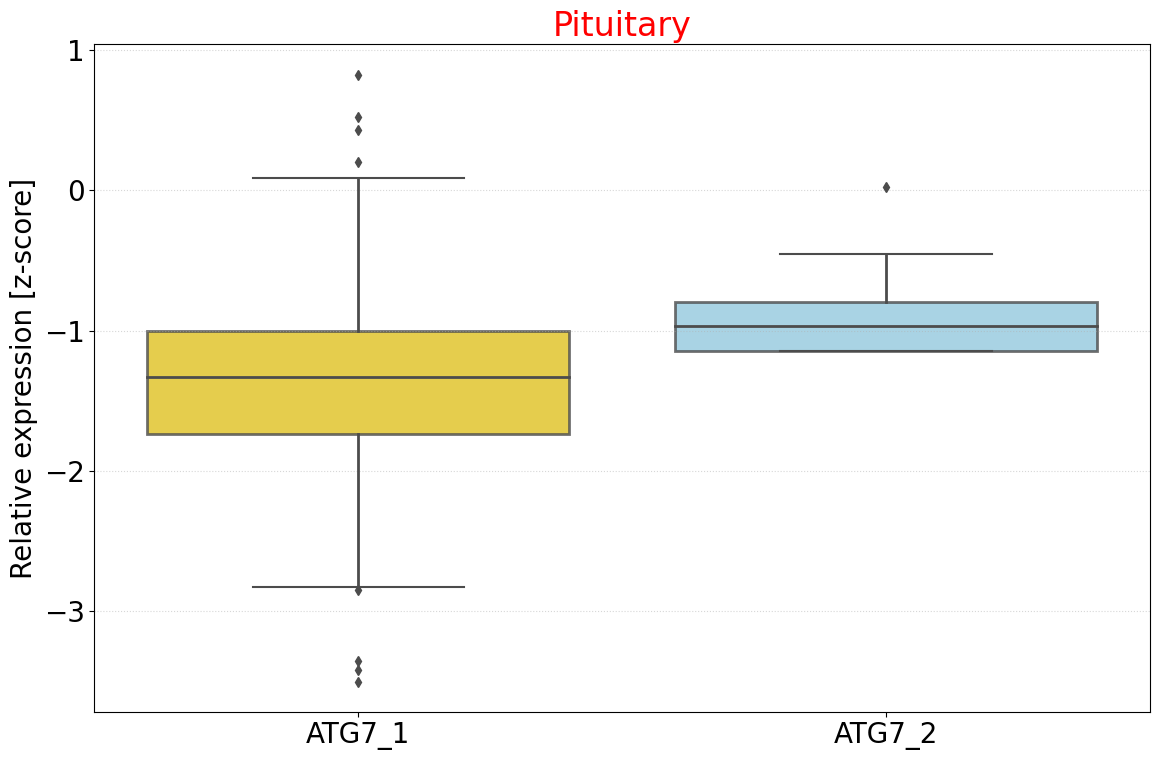

Blood Vessel
corrected P: 5.437143450150808e-41
n: 496


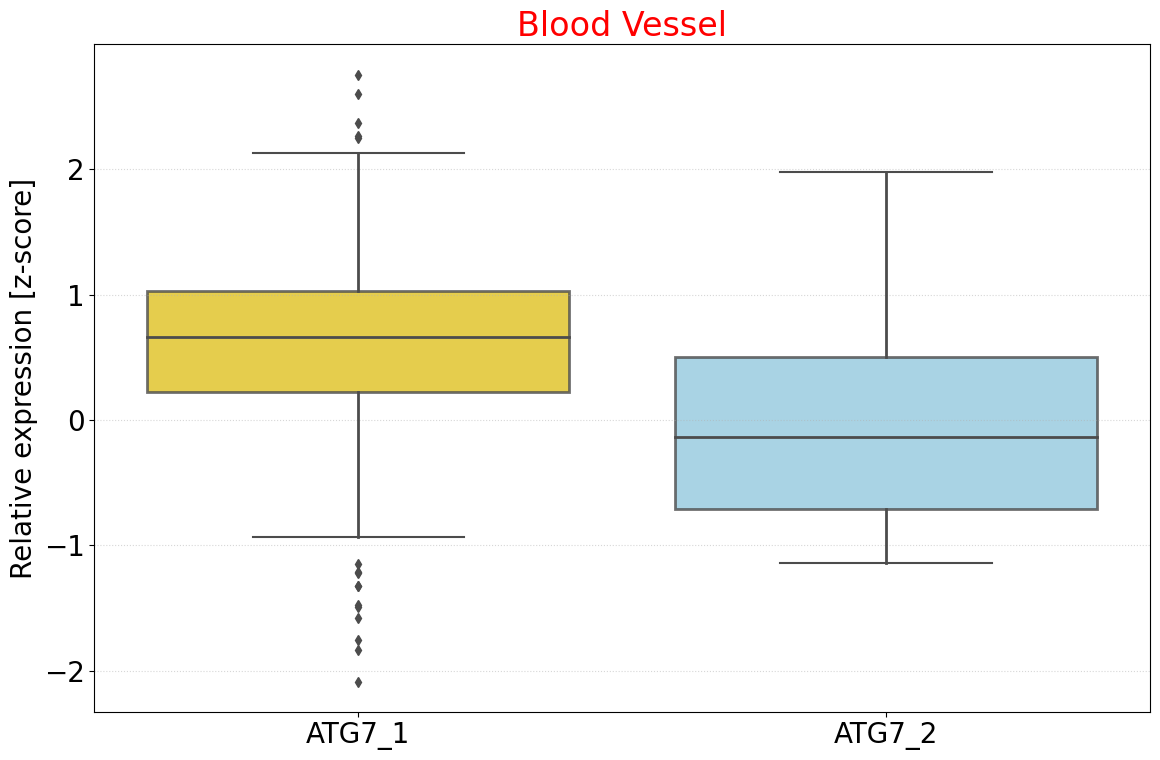

Blood
corrected P: 9.742150820254161e-26
n: 78


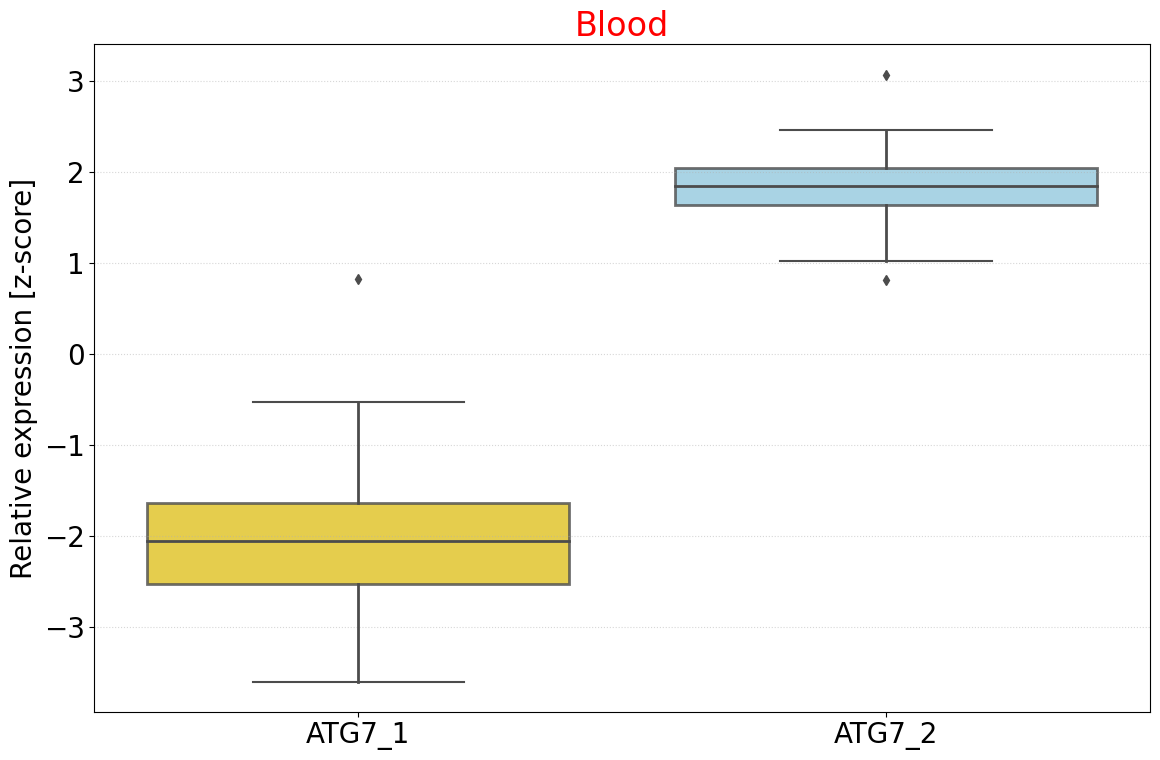

Uterus
corrected P: 7.746034795427031e-06
n: 71


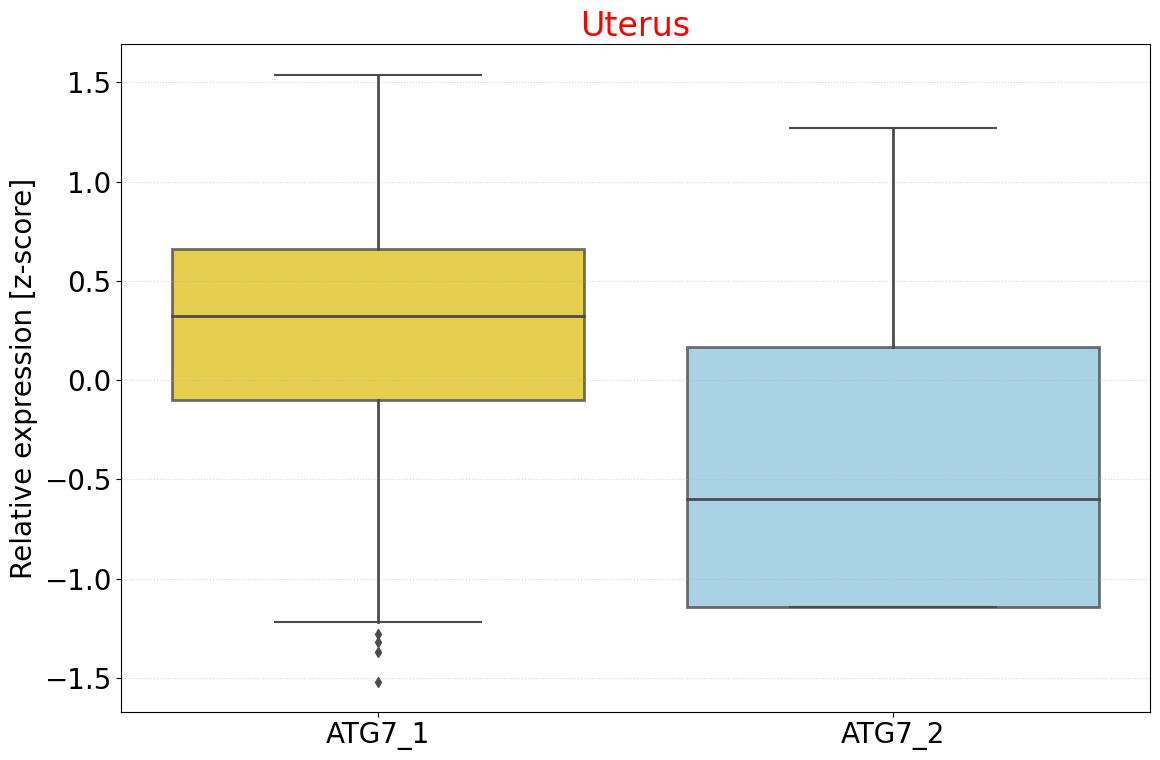

Colon
corrected P: 6.1387252886853805
n: 223


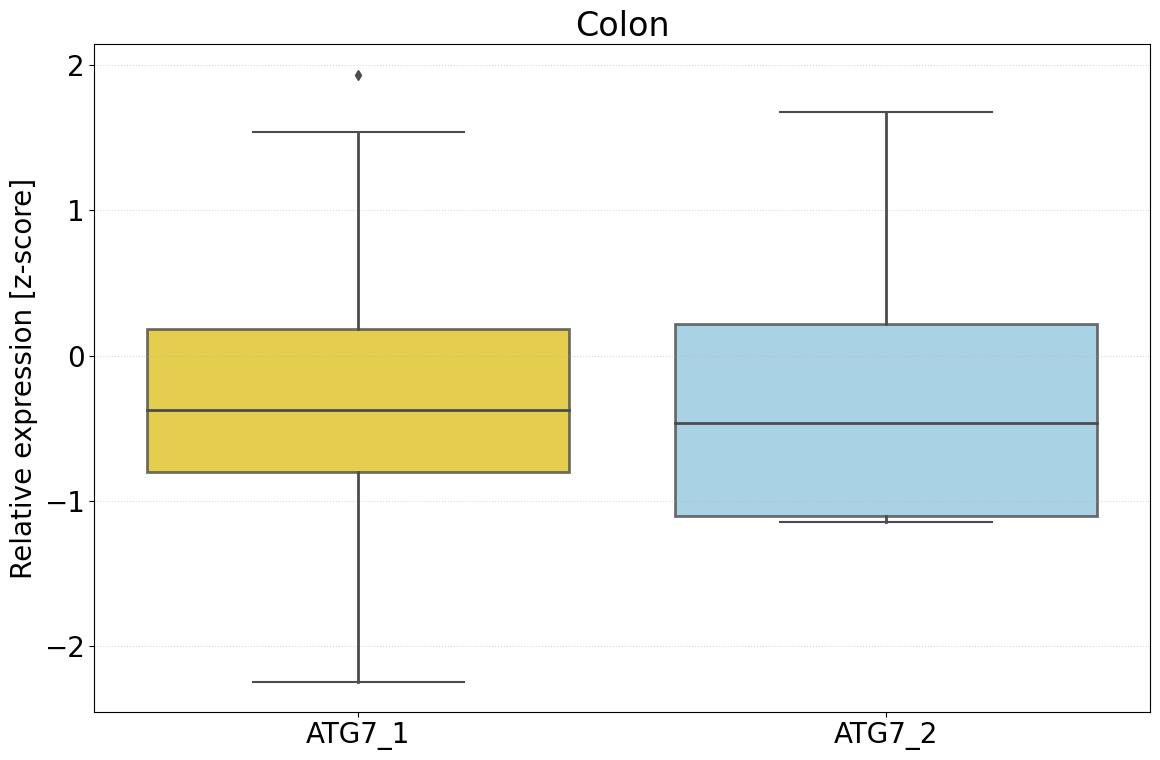

Vagina
corrected P: 0.04140833435953735
n: 77


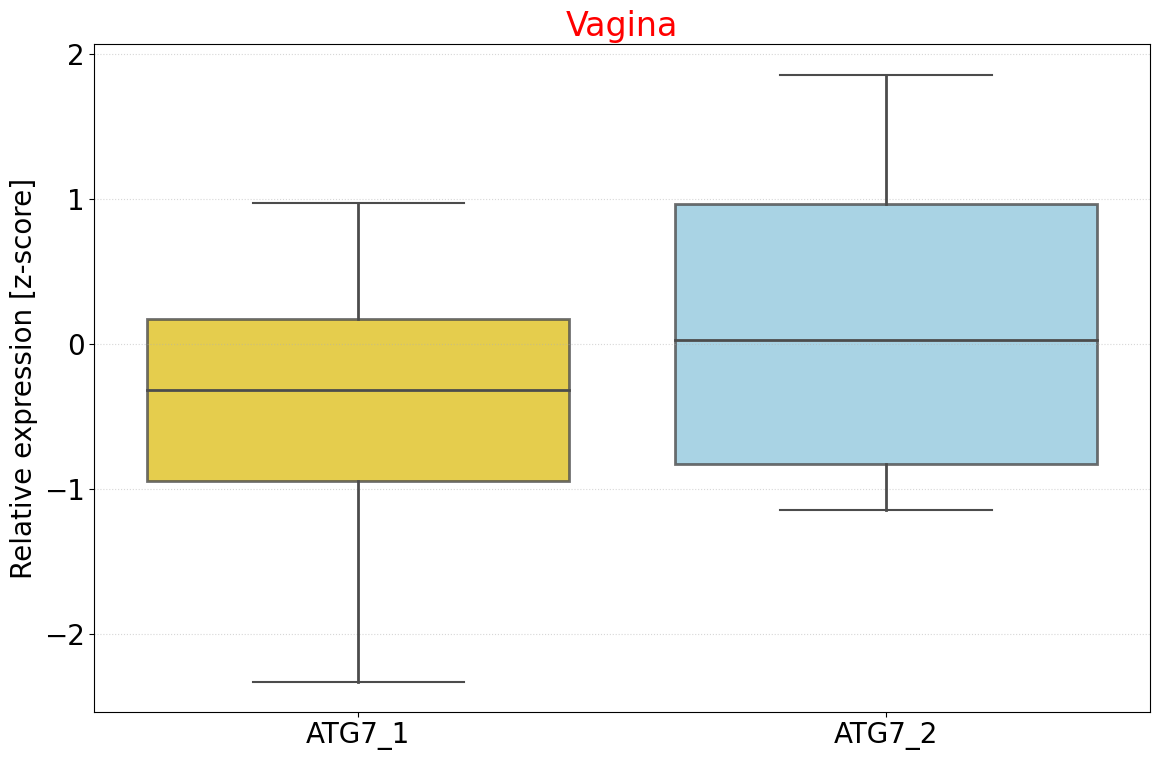

Stomach
corrected P: 5.357987233713863
n: 55


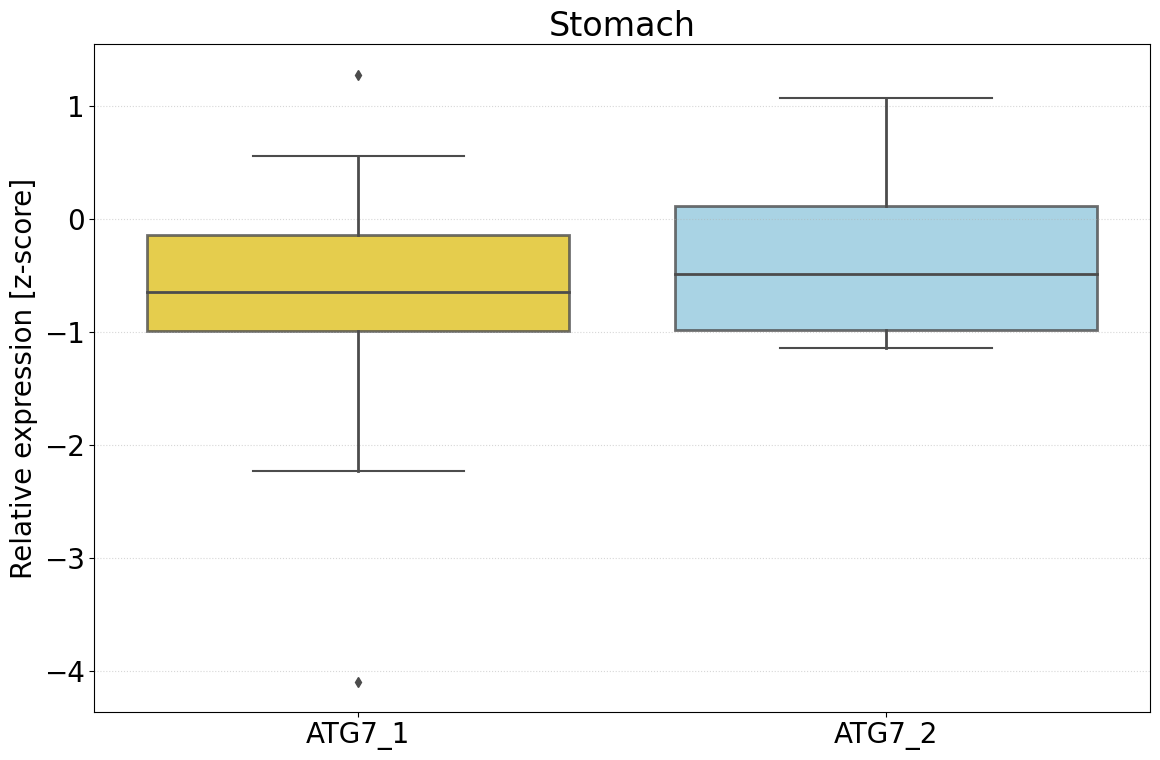

Ovary
corrected P: 1.658685392157384e-11
n: 86


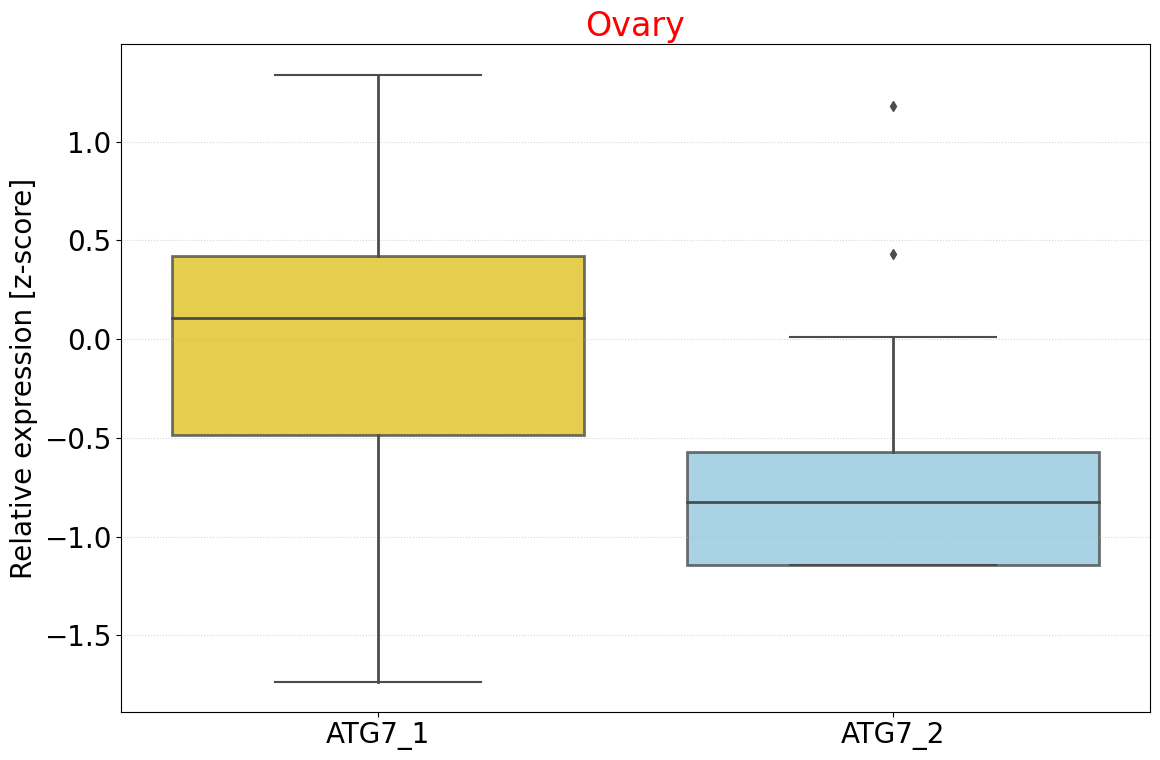

Testis
corrected P: 0.20996781008739468
n: 161


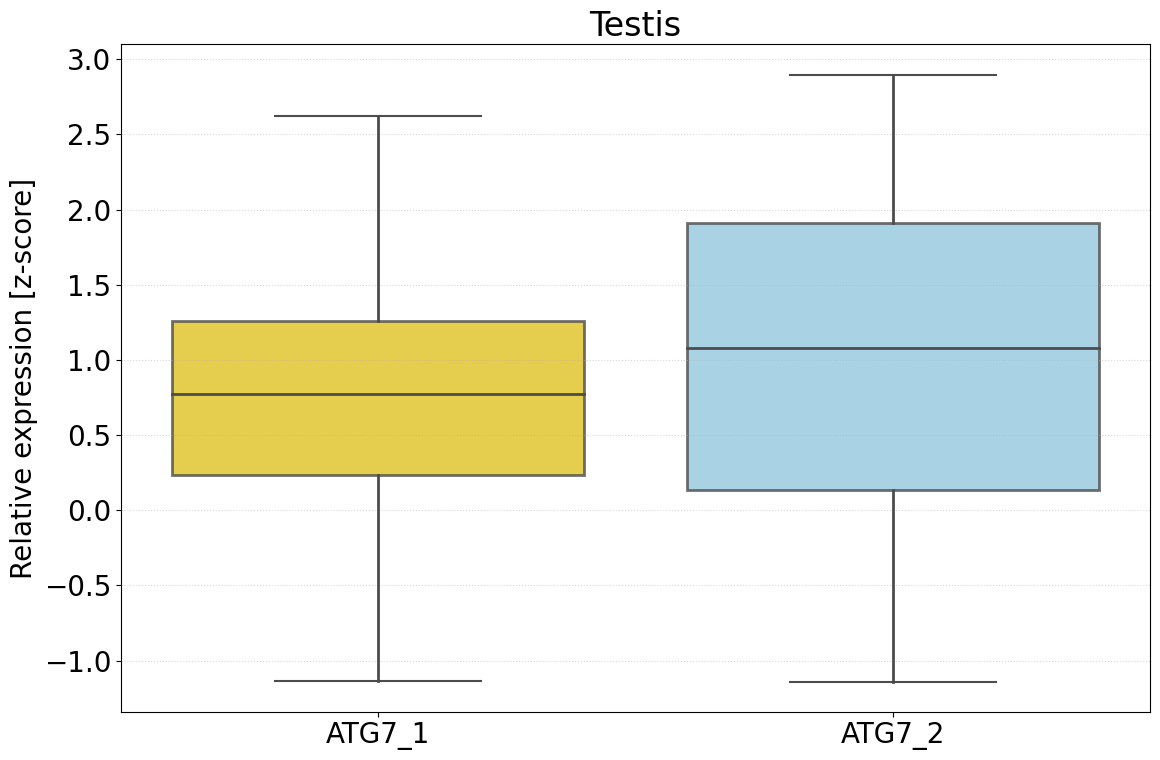

Breast
corrected P: 12.735234524267828
n: 159


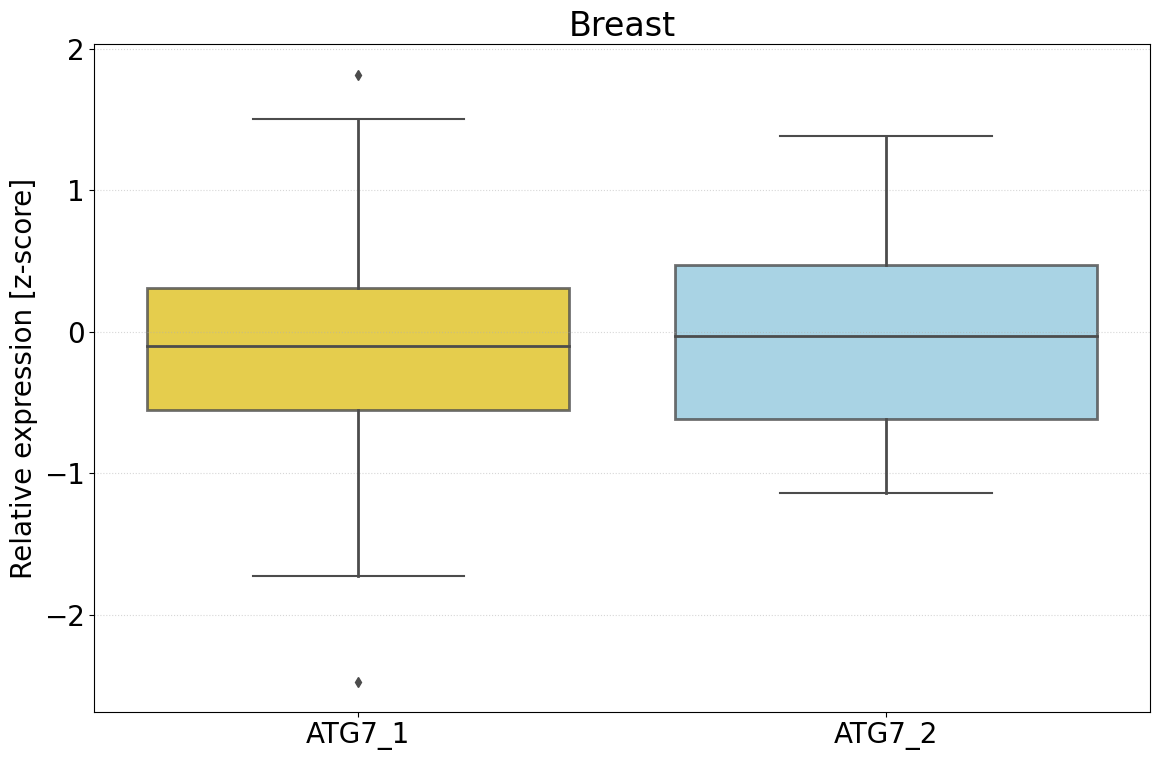

Prostate
corrected P: 2.9092262680053558e-11
n: 94


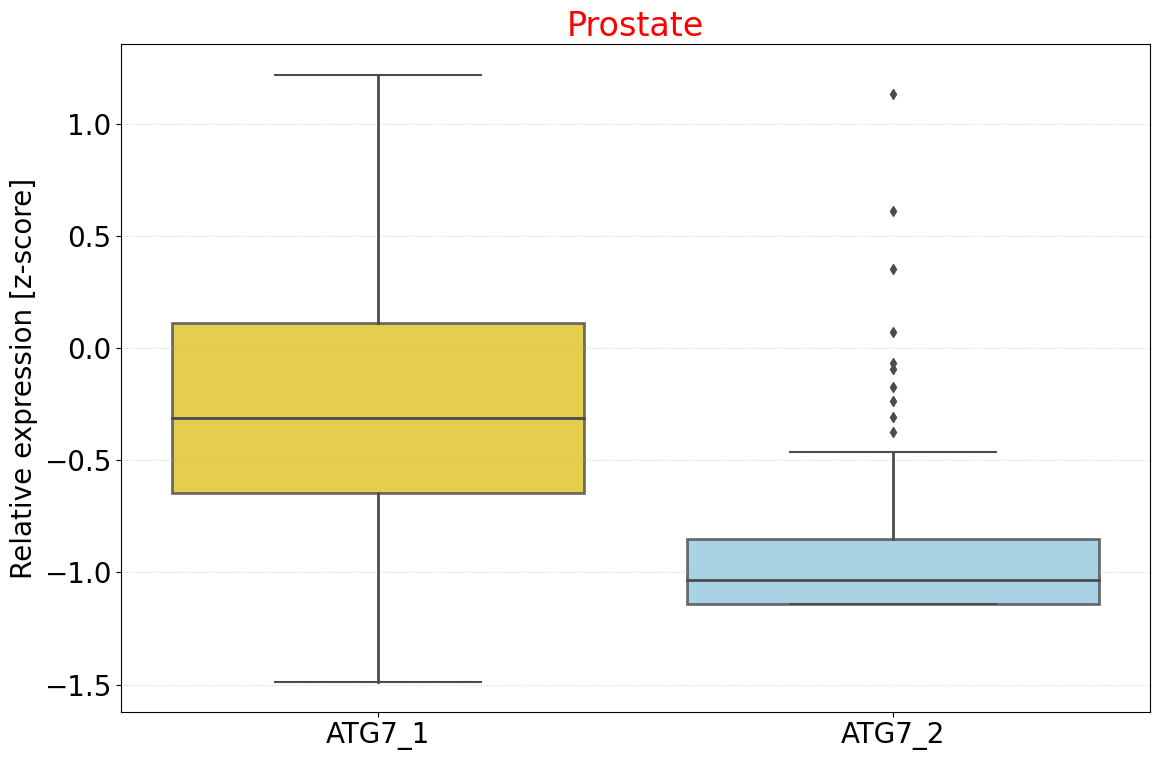

Nerve
corrected P: 6.188073227622452e-72
n: 259


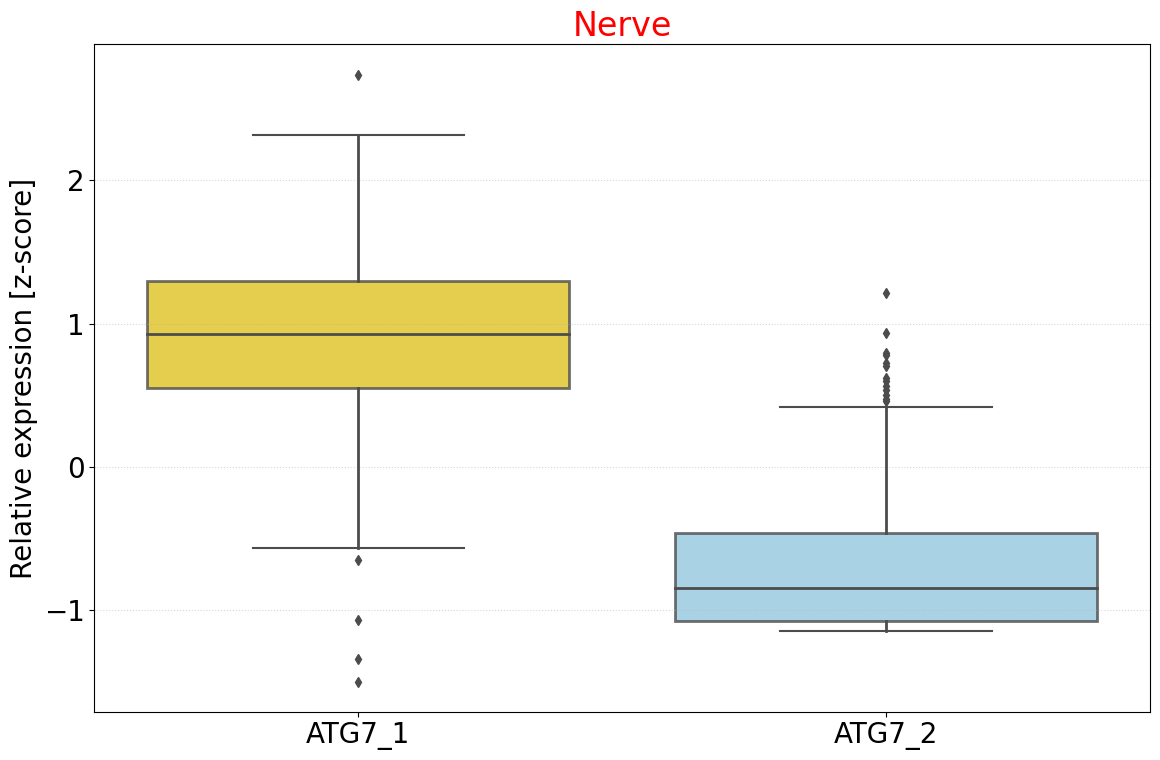

Spleen
corrected P: 6.953256540988777e-11
n: 91


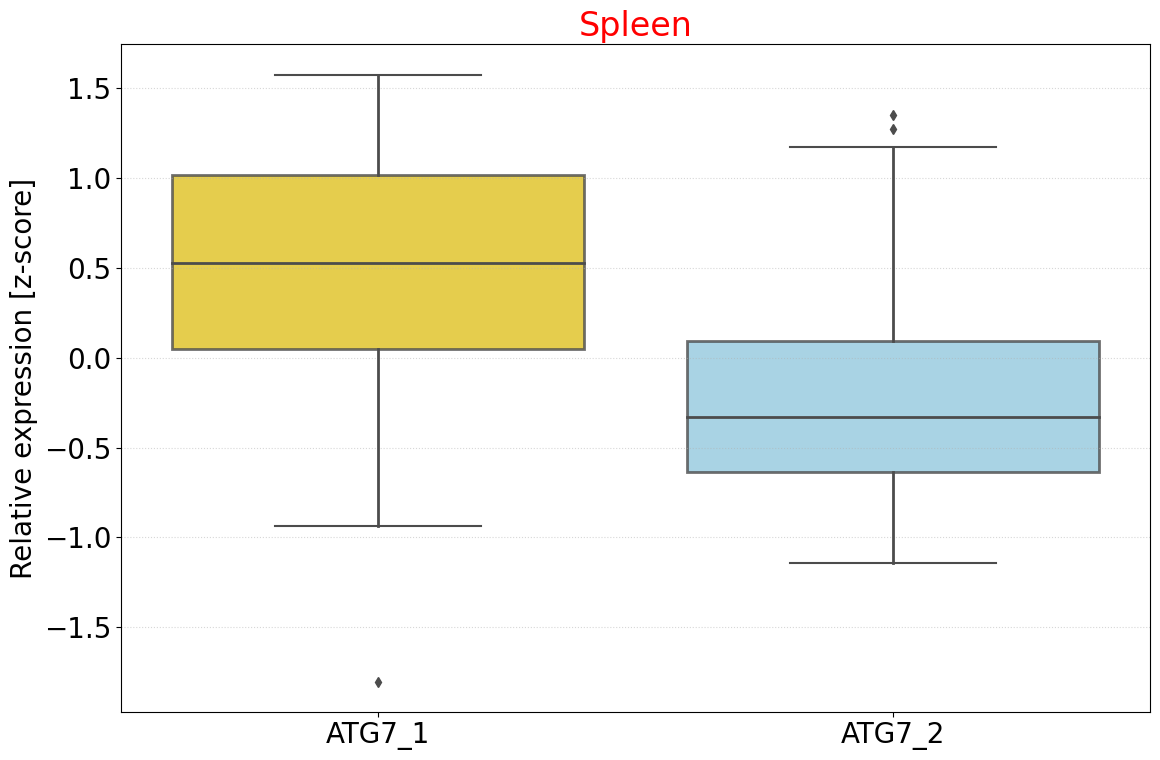

Salivary Gland
corrected P: 0.0014267837547098081
n: 42


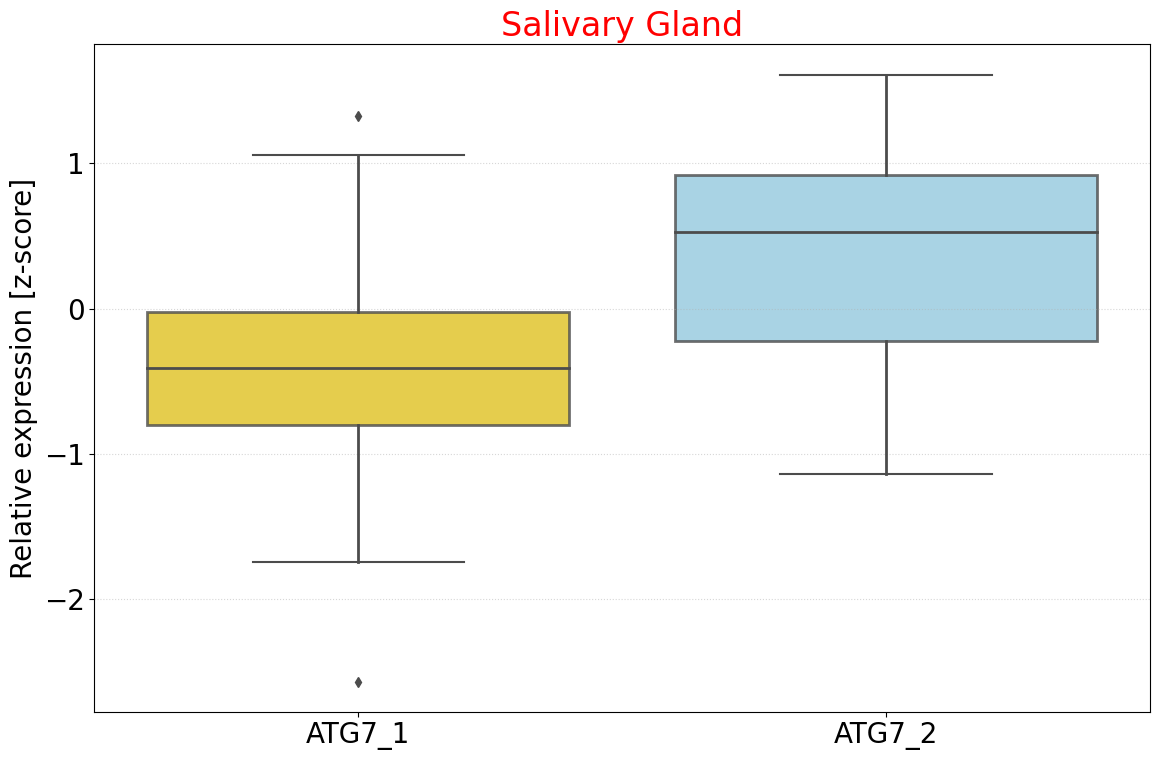

Adrenal Gland
corrected P: 6.933167492492653
n: 52


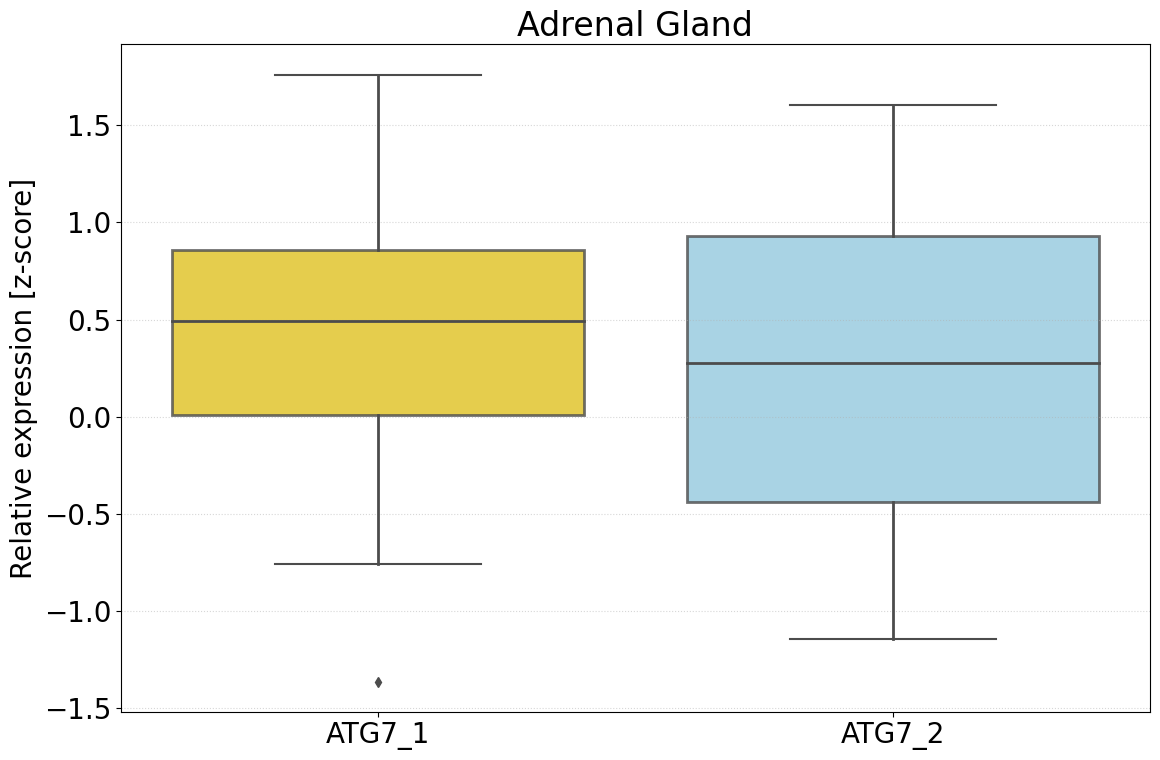

Small Intestine
corrected P: 0.01671641998858084
n: 76


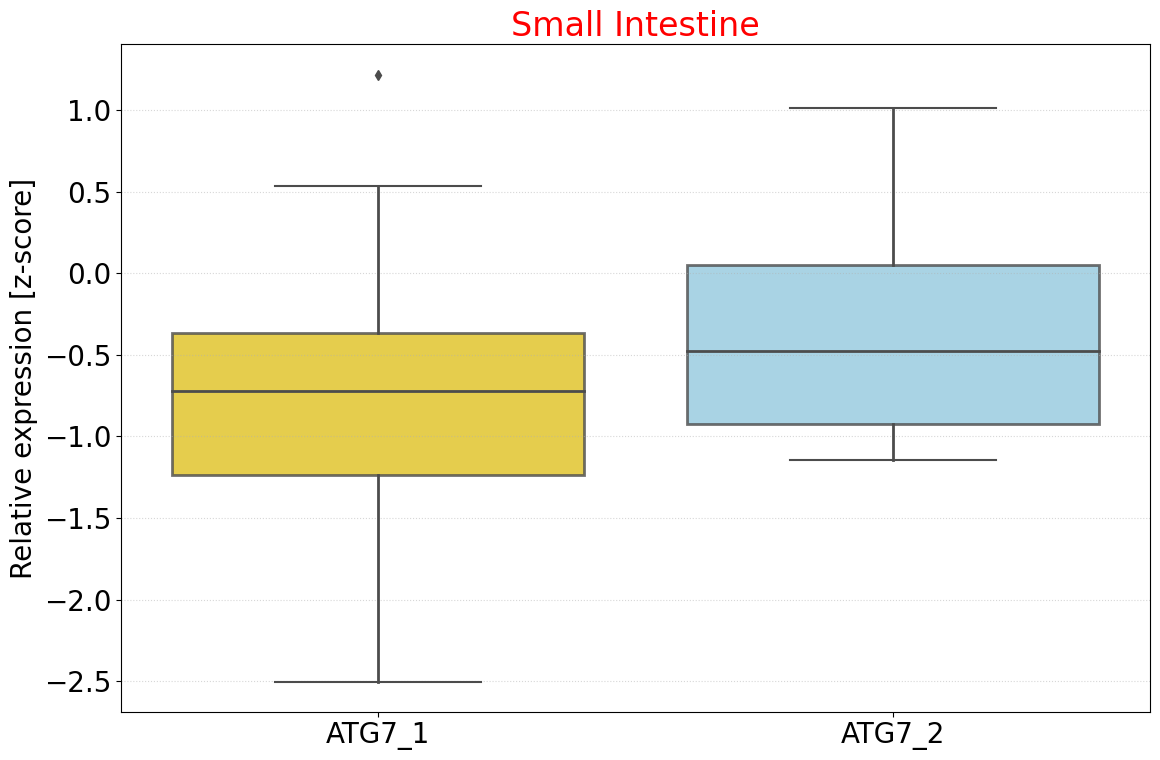

Skin
corrected P: 1.4251718573169205e-14
n: 559


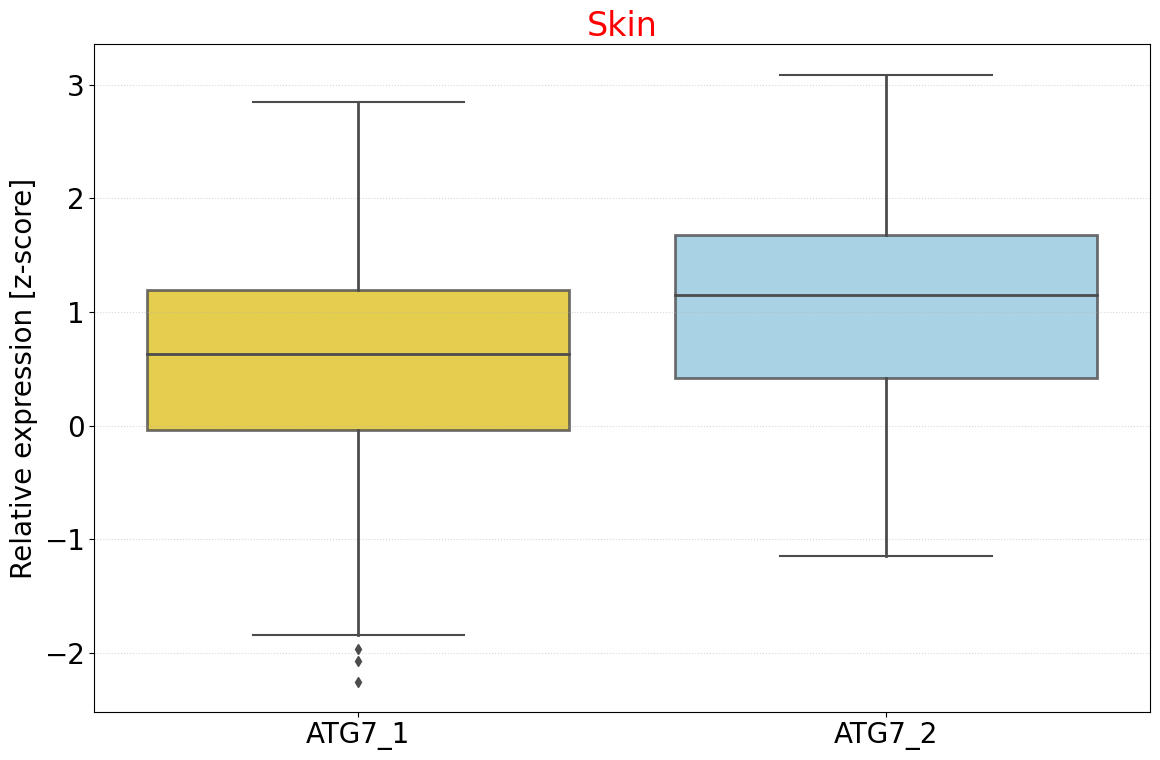

Esophagus
corrected P: 11.699145361498626
n: 411


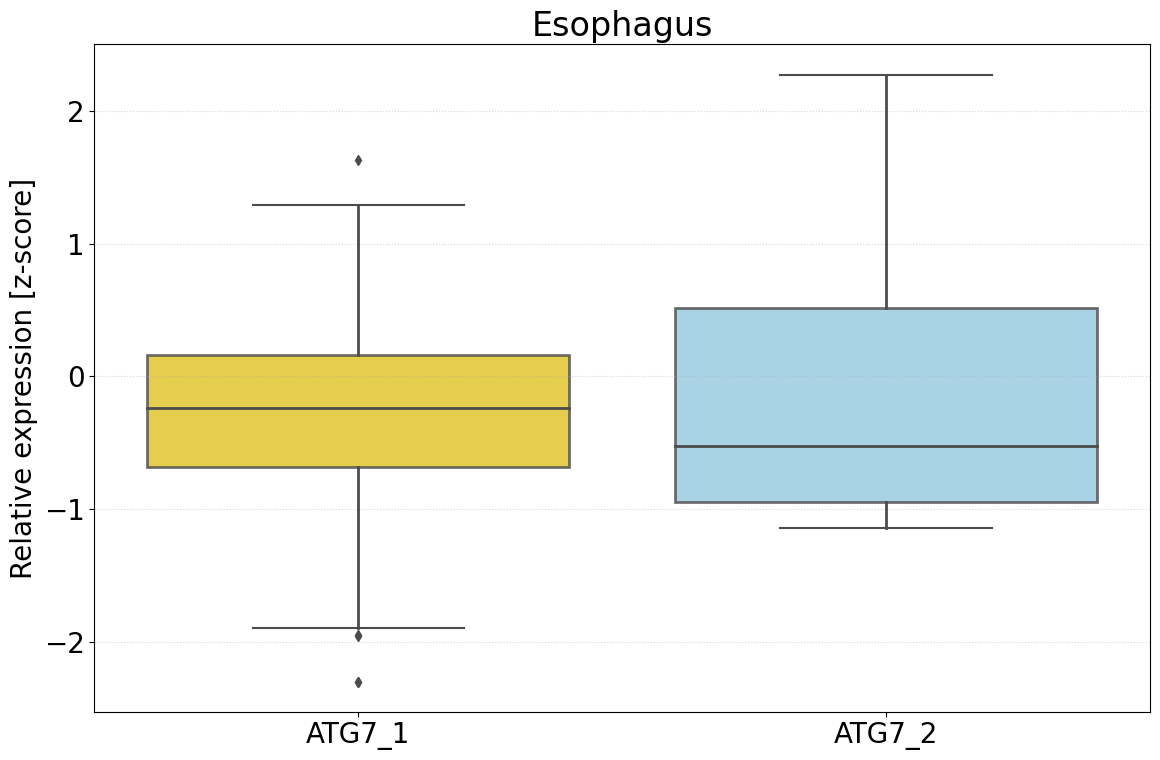

Brain
corrected P: 3.5002380329201657
n: 260


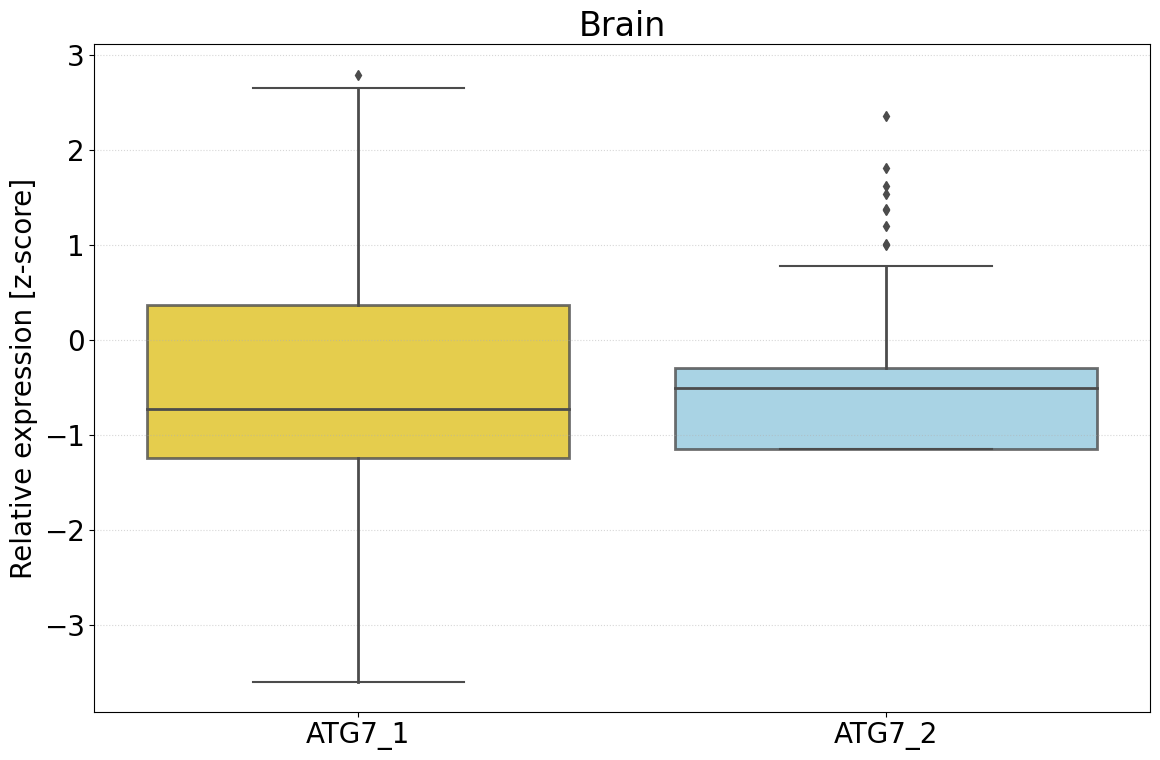

In [11]:
tissues = set( list(df["Primary_Site"]) )
mycolors = ['gold', 'skyblue']

for tissue in tissues:
    print(tissue)
    
    #subset
    df_ss = df[df['Primary_Site'] == tissue]
    
    # statistical test
    stat, pvalue = scipy.stats.mannwhitneyu(df_ss['ATG7_1'], df_ss['ATG7_2'])
    correctedP = pvalue*len(tissues)
    print('corrected P: {}'.format(correctedP))
    print('n: {}'.format(len(df_ss)))
    
    #Plot Graph
    seaborn.boxplot(df_ss.iloc[:,1:], palette=mycolors,
                    boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, 
                    whiskerprops={'lw':2}, showcaps=True)
    
    if correctedP < 0.05:
        plt.title(tissue, color='red')
    else:
        plt.title(tissue, color='black')
        
    plt.ylabel('Relative expression [z-score]')
    
    plt.tight_layout()
    plt.show()

### 1) FoldChange

                  FC_ATG7        Pvalue    adj_pvalue  significant
tissue                                                            
Blood            3.895644  4.428250e-27  9.742151e-26         True
Salivary Gland   0.937754  6.485381e-05  1.426784e-03         True
Skin             0.524696  6.478054e-16  1.425172e-14         True
Lung             0.415747  2.053362e-07  4.517396e-06         True
Pituitary        0.361104  2.987670e-09  6.572874e-08         True
Vagina           0.340436  1.882197e-03  4.140833e-02         True
Testis           0.305628  9.543991e-03  2.099678e-01        False
Small Intestine  0.249073  7.598373e-04  1.671642e-02         True
Brain            0.224344  1.591017e-01  1.000000e+00        False
Adipose Tissue   0.199331  1.968056e-03  4.329724e-02         True
Stomach          0.159729  2.435449e-01  1.000000e+00        False
Breast           0.076333  5.788743e-01  1.000000e+00        False
Colon           -0.095703  2.790330e-01  1.000000e+00        F

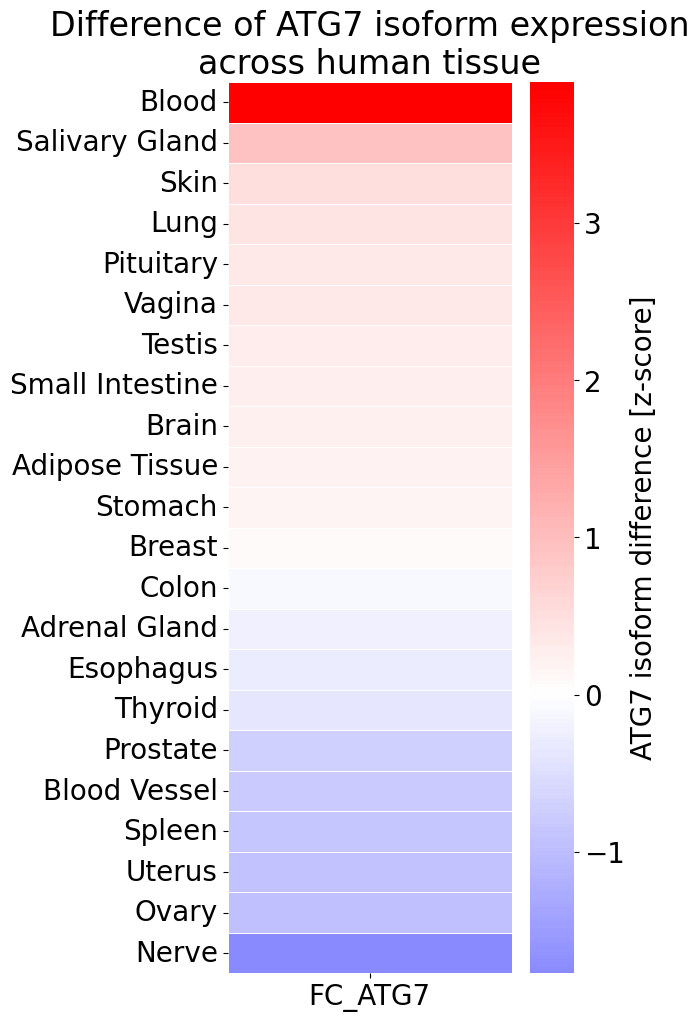

In [12]:
# Calculate fold change + Heatmap 
tissues = set( list(df["Primary_Site"]) )
tissue_l = []

isoforms = 'ATG7_1', 'ATG7_2'

foldchange_l = []
pvalue_l = []

for tissue in tissues:
    tissue_l.append(tissue)
    
    df_tissue = df[df['Primary_Site'] == tissue]
    #calculate Difference (primary / normal)
    fc = df_tissue['ATG7_2'].median() - df_tissue['ATG7_1'].median()
    foldchange_l.append(fc)
    #stats
    statistic, pvalue = scipy.stats.mannwhitneyu(df_tissue['ATG7_2'], df_tissue['ATG7_1'])
    pvalue_l.append(pvalue)

    
# Bonferroni correction on the number of tests. 30 (15 tissues x2)
p_values_nonAdj = pvalue_l
sign_answer, adj_pvalue, c , d  = multipletests(p_values_nonAdj, alpha = 0.05, method='bonferroni')
#save in dict, then to df
d = dict(tissue = tissue_l, FC_ATG7 = foldchange_l, Pvalue = pvalue_l,  adj_pvalue = adj_pvalue)
df_ATG7_diff_tissues = pandas.DataFrame.from_dict(d, orient='columns')
df_ATG7_diff_tissues = df_ATG7_diff_tissues.sort_values('FC_ATG7', ascending=False)
# and reset_index
df_ATG7_diff_tissues.set_index('tissue',inplace = True, drop = True)

df_ATG7_diff_tissues['significant'] = df_ATG7_diff_tissues['adj_pvalue'] < 0.05
df_ATG7_diff_tissues
print(df_ATG7_diff_tissues)

#Heatmap correlation
HeatMap_df = df_ATG7_diff_tissues[['FC_ATG7']].astype(float)

plt.subplots(figsize=(5,10))
plt.tight_layout()
seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0,
               cbar_kws={'label': 'ATG7 isoform difference [z-score]'})
plt.ylabel('')
plt.title('Difference of ATG7 isoform expression\nacross human tissue')

title_file = 'Heatmap_difference_expression_zscore'
plt.savefig(path2+title_file+'.svg')

## C. ATG7 isoform correlation

### 1. For all tissue

In [20]:
#Remove the 0.5% extremities to have a nicer graph
isoforms = 'ATG7_1', 'ATG7_2'

#Remove 0.5% extremities
df_no_extrem = []
for isoform in isoforms:
    #sort by value, 
    for_isoforms = df.sort_values([isoform], ascending = False)
    print(isoform)

    #remove the extremities
    lenght = len(for_isoforms)
    without_05perc = int(lenght*0.005)
    print('', without_05perc, 'are removed from head and tail')
    without_head = without_05perc
    without_tail = lenght - without_05perc

    df_no_extremities = for_isoforms.iloc[without_head:without_tail,:]
    print(' without extremities:', df_no_extremities.shape)
    print()
    df_no_extrem.append(df_no_extremities)
        
#drop the unfiltered column ATG7_2 ([0]) and replace it with the filtered one ([1]) 
df_no_extrem[0].pop("ATG7_2")
#add column ATG7_2 (filtered one) at the correct position
df_no_extrem[0].insert(2, "ATG7_2", df_no_extrem[1]['ATG7_2'])
#remove NaN (the deleted samples for the two isoform)
df_final = df_no_extrem[0].dropna(axis=0)

print('df_final after merge of the two filtered columns:', df_final.shape)
print('________________________')

ATG7_1
 21 are removed from head and tail
 without extremities: (4268, 3)

ATG7_2
 21 are removed from head and tail
 without extremities: (4268, 3)

df_final after merge of the two filtered columns: (4226, 3)
________________________


Correlation between ATG7(1) and ATG7(2):
Pearson corr score is: -0.02517202614089827, 0.10180810070029168
Spearman corr is: 0.0037422704255008978, 0.8078464030170525


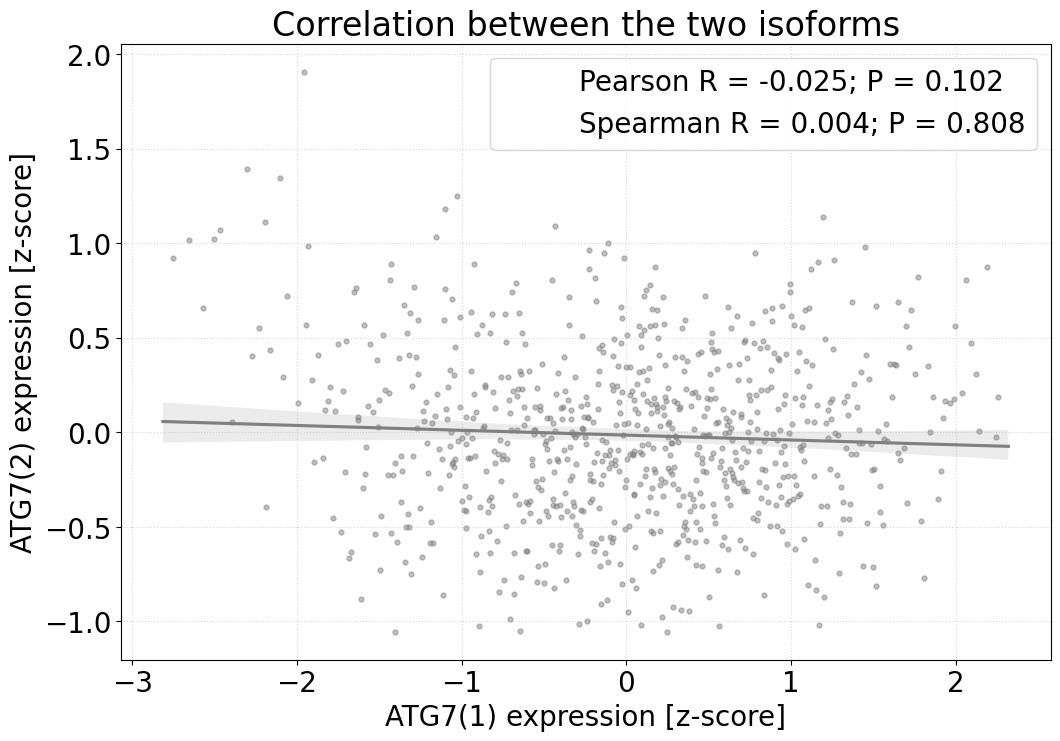

In [65]:
#Graph and stats_ spearman correlation
x = df_final['ATG7_1'].to_list()
y = df_final['ATG7_2'].to_list()    

print('Correlation between ATG7(1) and ATG7(2):')
#stat Pearson correlation score 
r_value_pcs, p_value_pcs = scipy.stats.pearsonr(x, y)
print(f'Pearson corr score is: {r_value_pcs}, {p_value_pcs}')

#stat Spearman correlation score
r_value_scs, p_value_scs = scipy.stats.spearmanr(x, y)
print(f'Spearman corr is: {r_value_scs}, {p_value_scs}')

#graph
plt.figure(figsize=(12, 8))
seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker=".",
                scatter_kws={"color": "grey", "alpha": 0.5}, line_kws={"color": "grey"})

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'Pearson R= {str(round(r_value_pcs,3))}; P= {str(round(p_value_pcs,3))}')

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'Spearman R= {str(round(r_value_scs,3))}; P= {str(round(p_value_scs,3))}')

plt.title(f'Correlation between the two isoforms')
plt.xlabel("ATG7(1) expression [z-score]")
plt.ylabel('ATG7(2) expression [z-score]')

plt.legend()

#save
title_file = 'ATG7s_corr_zscore_article'
plt.savefig(path2+title_file+'_article.svg')

plt.show()  
print()

### 2. For each tissue

In [21]:
#stats_ spearman correlation
#graph
tissue_l = []
r_value_l = []
p_value_l = []

tissues = set( list(df["Primary_Site"]) )
for tissue in tissues:  

#     print(tissue)
    df_tissue = df[df['Primary_Site'] == tissue]  
    
    x = df_tissue['ATG7_1'].to_list()
    y = df_tissue['ATG7_2'].to_list()    

    #stat Spearman correlation 
    r_value, p_value = scipy.stats.spearmanr(x, y)

    r_value_l.append(r_value)
    p_value_l.append(p_value)
    tissue_l.append(tissue)

    
# Bonferroni correction on the number of tests
p_values_nonAdj = p_value_l
sign_answer, adj_pvalue, c , d  = multipletests(p_values_nonAdj, alpha = 0.05, method='bonferroni')

#save in dict, then to df
d = dict(tissue = tissue_l, Corr_score = r_value_l, P_value = p_value_l,  adj_pvalue = adj_pvalue)

#Transpose to have a better table
df_atg7_correlation_tissues = pandas.DataFrame.from_dict(d, orient='index')
df_atg7_correlation_tissues = df_atg7_correlation_tissues.transpose()

#keep minimum text in sample_type for later
df_atg7_correlation_tissues.head(4)

# indicate when significant
df_atg7_correlation_tissues['significant'] = df_atg7_correlation_tissues['adj_pvalue'] < 0.05
df_atg7_correlation_tissues

,tissue,Corr_score,P_value,adj_pvalue,significant
0,Adipose Tissue,-0.136886,0.0049,0.10779,False
1,Thyroid,-0.030496,0.625853,1.0,False
2,Lung,-0.053924,0.371286,1.0,False
3,Pituitary,-0.303596,0.001731,0.038072,True
4,Blood Vessel,-0.356268,0.0,0.0,True
5,Blood,0.379977,0.000601,0.013213,True
6,Uterus,-0.274291,0.020625,0.453749,False
7,Colon,-0.328582,0.000001,0.000011,True
8,Vagina,-0.415505,0.000171,0.003771,True
9,Stomach,-0.176572,0.197197,1.0,False


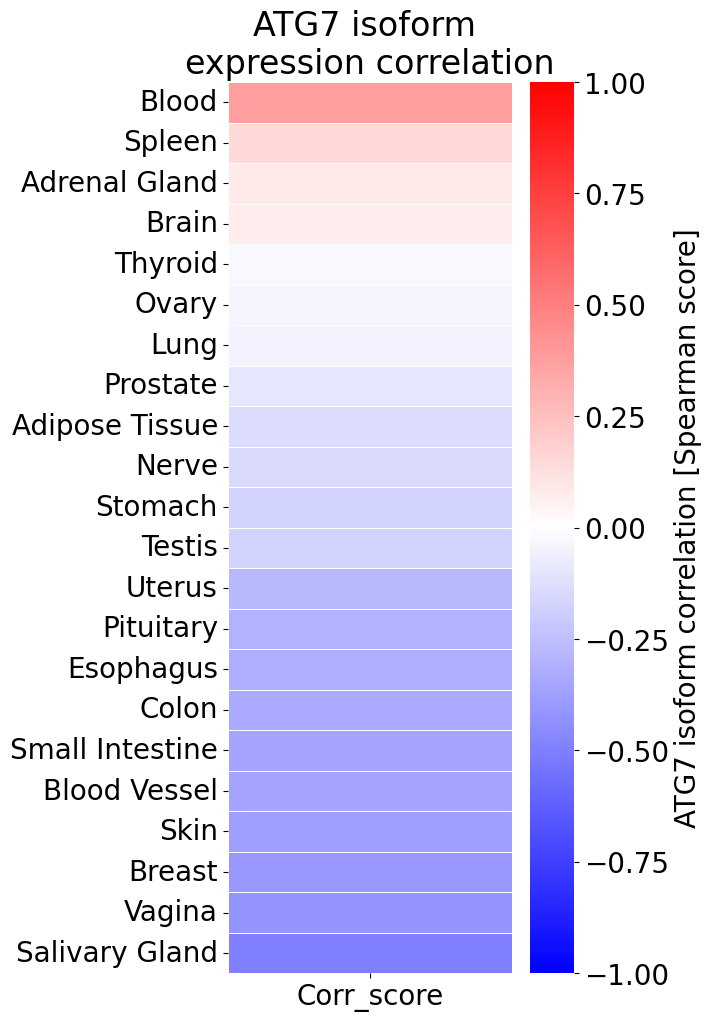

In [22]:
#Heatmap correlation version 1
df_corr_v1 = df_atg7_correlation_tissues.copy()
df_corr_v1.sort_values('Corr_score', ascending=False, inplace = True)
df_corr_v1.set_index('tissue', inplace = True)

HeatMap_df = df_corr_v1[['Corr_score']].astype(float)

plt.subplots(figsize=(5,10))
plt.tight_layout()
seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, vmin = -1, vmax= 1,center=0,
               cbar_kws={'label': 'ATG7 isoform correlation [Spearman score]'})
plt.ylabel('')
plt.title('ATG7 isoform \nexpression correlation')

title_file = 'Heatmap_Correlation'
plt.savefig(path2+title_file+'.svg')

### Version 2

In [23]:
df_atg7_correlation_tissues.head()

,tissue,Corr_score,P_value,adj_pvalue,significant
0,Adipose Tissue,-0.136886,0.0049,0.10779,False
1,Thyroid,-0.030496,0.625853,1.0,False
2,Lung,-0.053924,0.371286,1.0,False
3,Pituitary,-0.303596,0.001731,0.038072,True
4,Blood Vessel,-0.356268,0.0,0.0,True


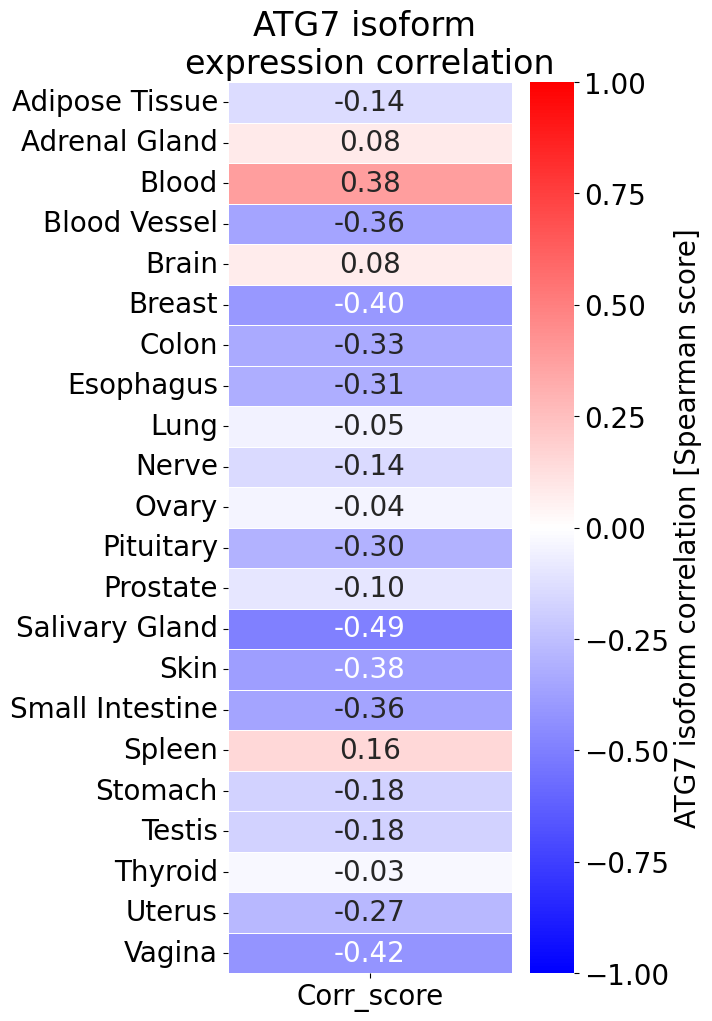

In [24]:
#Heatmap correlation version 2
df_corr_v2 = df_atg7_correlation_tissues.copy()
df_corr_v2.sort_values('tissue', ascending=True, inplace = True)
df_corr_v2.set_index('tissue', inplace = True)

HeatMap_df = df_corr_v2[['Corr_score']].astype(float)

plt.subplots(figsize=(5,10))
plt.tight_layout()
seaborn.heatmap(HeatMap_df, annot=True, cmap="bwr", linewidths=.5, vmin = -1, vmax= 1,center=0,
                cbar_kws={'label': 'ATG7 isoform correlation [Spearman score]'}, fmt='.2f')
plt.ylabel('')
plt.title('ATG7 isoform \nexpression correlation')

title_file = 'Heatmap_Correlation'
plt.savefig(path2+title_file+'.svg')